In [1]:
import numpy as np
from helpers import exp_range, plot_learning_curve, plot_validation_curve, fit_and_score_iteratively, plot_curves

import pydotplus
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from classes import BalancedUndersamplingShuffle, balanced_sampling
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import fbeta_score, make_scorer


In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:10000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:10000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:10000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(10000, 784) (10000, 784) (10000, 1) (10000, 1) (10000, 10) (10000, 10)


# Baseline Model

In [12]:
# no undersampling
# Baseline model
# using non one-hot encoded y's

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)


In [13]:
print(train_res, test_res)

1.0 0.8081


In [14]:
# no undersampling
# Baseline model
# using one-hot encoded y's

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True)
print(train_res, test_res)

1.0 0.8101


In [15]:
print(train_res, test_res)

1.0 0.8101


In [17]:
print(classifier.get_depth())

24


# Validation Curves and tuning

### max_depth

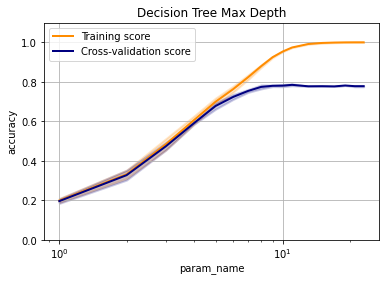

In [3]:
# max_depth - accuracy
param_range = list(range(1, 11)) + list(range(11, 25, 2))

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
train_scores, test_scores, labeled_train, labeled_test, plt = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='max_depth', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='Decision Tree Max Depth')



In [4]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

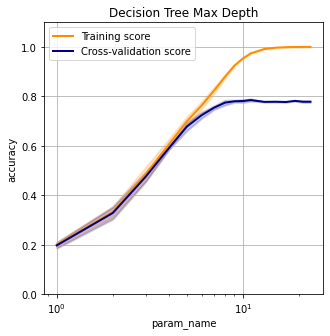

In [5]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Decision Tree Max Depth',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5))